# Жадный алгоритм / Greedy algorithm

In [1]:
# Пример / example
S = set(range(1, 11))
subsets = [set([1, 2, 3, 8, 9, 10]),
           set([1, 2, 3, 4, 5]),
           set([4, 5, 7]),
           set([5, 6, 7]),
           set([6, 7, 8, 9, 10])]


def greedy_set_cover(S, subsets):

    # Проверка на то, что элементы подмножеств смогут охватить множество S
    # Checking existence of cover
    elements = set(e for s in subsets for e in s)
    if elements != S:
        return None

    covered = set() # Множество покрытых элементов / set of covered elements
    cover = []      # Выбранные для покрытия подмножества / subsets in cover

    # Основной цикл / main loop
    while covered != elements:
        subset = max(subsets, key=lambda s: len(s - covered))
        cover.append(subset)
        covered |= subset
    return cover

# Вывод результатов / results
cover = greedy_set_cover(S, subsets)
print("Множество S / set S:",S)
print("Подмножества, входящие в покрытие / subsets in cover:")
for subset in cover:
    print(subset)

Множество S / set S: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
Подмножества, входящие в покрытие / subsets in cover:
{1, 2, 3, 8, 9, 10}
{4, 5, 7}
{5, 6, 7}


# Генетический алгоритм / Genetic algorithm

In [2]:
import random
random.seed(42)

# Генерация моножества для покрытия / generation set for cover
universe = [i * 10 for i in range(1, 21)]

# Генерация подмоножеств / generation of subsets
subsets = [set(sorted(random.sample(universe, random.randint(1, len(universe) - 7)))) for i in range(15)]

# Генерация весов / generation of weight
C = [random.randint(1, 100) for i in range(len(subsets))]

# Вывод входных данных / printing of input
print("universe:", universe)
print("\nsubsets:")
for sub in subsets:
    print(sorted(sub))
print("\nC", C)

# Проверка на то, что покрытие существует / Checking existence of cover
print("\nСуществует покрытие / Existence of cover:")
elements = set(e for s in subsets for e in s)
if sorted(elements) != universe:
    print("Нет / No")
else:
    print("Да / Yes")

universe: [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]

subsets:
[10, 20, 30, 40, 80, 90, 110, 120, 130, 170, 180]
[10, 20, 30, 40, 70, 90, 100, 140, 180, 200]
[80, 140, 150, 180]
[10, 20, 30, 40, 50, 60, 90, 110, 140, 180]
[40, 130]
[20, 40, 90, 120, 150, 170]
[20, 30, 70, 100, 120, 170, 180]
[80]
[30, 40, 50, 60, 80, 100, 110, 120, 130, 170, 180, 190, 200]
[30, 40, 50, 60, 70, 80, 90, 110, 170, 180, 200]
[20, 40, 50, 60, 70, 80, 100, 110, 170, 190, 200]
[50, 130, 150, 160]
[50, 80, 90, 140, 180]
[10, 20, 30, 50, 80, 120, 130, 150, 160, 200]
[10, 30, 50, 60, 80, 90, 100, 130, 140, 160, 170]

C [88, 93, 15, 88, 69, 97, 35, 99, 83, 44, 15, 38, 56, 21, 59]

Существует покрытие / Existence of cover:
Да / Yes


In [3]:
def genetic_algorithm(universe, subsets, С, N = 100, t_max = 1000):
    '''
    universe - множество для покрытия / set to cover
    subsets - спосок подмножеств / subsets 
    C - список стоимостей подмонжеств / weight of subsets
    N - количество особей в популяции / number of individuals
    t_max - количество эпох алгоритма / number of eras
    '''
    # Задание функции приспособленности (целевой функции)
    # Setting fitness function
    f = lambda ind: sum([C[j] * ind[j] for j in range(len(ind))])
    
    # Функция проверки того, что особь является покрытием множества
    # Function of checking that individual is a cover
    def check(x):
        check_list = []
        for j in range(len(subsets)):
            if x[j]:
                check_list.append(subsets[j])
        
        # Проверка на то, что элементы подмножеств смогут охватить множество S
        # Checking existence of cover
        elem = set(e for s in check_list for e in s)
        if sorted(elem) != sorted(universe):
            return False
        else:
            return True
    
    import random
    ################# Step 1 Generation first population ###################
    X = [[random.randint(0, 1) for j in range(len(subsets))] for i in range(N)]
    
    
    t = 0            # Счетчик эпох / Counter of eras
    indicator = 0    # Счетчик эпох без изменения популяции / Counter of eras without changes
    
    while t != t_max and indicator != len(universe): 
        past_X = X.copy()
        
        ########## Step 2. Selection of two individuals by tournament selection ############
        f_list = [] # Cписок значений функции приспособленности для каждой особи в популяции / f values list
        for i in range(len(X)):
            if sum(X[i]) == 0:
                X[i] = [1 for j in range(len(subsets))]
        for x in X:
            f_list.append(1 / f(x))
            
        Sum_P_list = sum(f_list)
        P_list = list(map(lambda x: x / Sum_P_list, f_list))

        # Находим накопленную сумму / Find the accumulated probability
        import itertools
        P_list_accum = list(itertools.accumulate(P_list))
        
        rand = random.random()

        # Выбираем родительские особи / Choosing Parents
        for k in range(len(P_list_accum)):
            if P_list_accum[k] > rand:
                parent1 = X[k - 1]
                id1 = k - 1
                parent2 = X[k]
                id2 = k
                break

        ###################### Step 3 Crossover #####################
        new_x = [] # new individual
        p0 = sum([item for sublist in X for item in sublist]) / (len(subsets) * N)
        p1 = 1 - p0
        for j in range(len(parent1)):
            if parent1[j] == parent2[j]:
                new_x.append(parent1[j])
            else:
                if parent1[j] == 0:
                    if 1 / f_list[id1] * p0 >= 1 / f_list[id2] * p1:
                        new_x.append(parent1[j])
                    else:
                        new_x.append(parent2[j])
                else:
                    if 1 / f_list[id1] * p1 >= 1 / f_list[id2] * p0:
                        new_x.append(parent1[j])
                    else:
                        new_x.append(parent2[j])

        ###################### Step 4 Mutation ##################################
        H = []
        for j in range(len(new_x)):
            H.append(random.uniform(0, 2 / N))
        for j in range(len(new_x)):
            if H[j] > 1 / N and new_x[j] == 1 and p1 > p0:
                new_x[j] = 0
            elif H[j] > 1 / N and new_x[j] == 0 and p0 > p1:
                new_x[j] = 1

        ################# Step 5  Decision Recovery Algorithm #################
        M = 0
        while M != set():
            
            # Step 5.1
            K = []
            for elem in universe:
                var_list = set()
                var = 0
                for subset in subsets:
                    if elem in subset:
                        var_list.add(var)
                    var += 1
                K.append(var_list)
            R = set([i for i in range(len(new_x)) if new_x[i]])
            W = [len(R & i) for i in K]
            M = set([list(universe)[i] for i in range(len(W)) if W[i] == 0])

            # Step 5.2
            var1=float("inf")
            var2=float("inf")
            S = None
            min_S = float("inf")
            for j in range(len(subsets)):
                if len(subsets[j] & M) != 0:
                    var1 = C[j] / len(subsets[j] & M)
                if var1 < min_S:
                    min_S = var1
                    S = subsets[j]
                    var2 = j
            if var2 !=float("inf"):
                R.add(var2)
            if S!=None:
                for i in range(len(W)):
                    if universe[i] in S:
                        W[i] += 1
                M = M - S
            
            # Step 5.3
            R_new = R.copy()
            for j in R:
                w_list = [W[universe.index(el)] > 1 for el in subsets[j]]
                if all(w_list):
                    R_new -= {j}
                    for i in range(len(W)):
                        if universe[i] in subsets[j]:
                            W[i] -= 1
            R = R_new
            M = set([list(universe)[i] for i in range(len(W)) if W[i] == 0])

            # Step 5.4 
            new_x = [0] * len(subsets)
            for el in R:
                new_x[el] = 1

        ################# Step 6 Replacing an individual in a population ######################
        if new_x not in X:
            d = [1 / x for x in f_list]
            aver = sum(d) / len(d)
            id_to_change = [i for i in range(len(d)) if d[i] >= aver]
            X[random.choice(id_to_change)] = new_x
        
        # Подготовка к новой эпохе / Preparing for a new era
        t += 1
        if past_X == X:
            indicator+=1
        else:
            indicator=0


    # Проверка, что особь в популяции Х является покрытием. Если нет, заменяем значение f на бесконечность   
    # Verification that an individual in population X is a cover. If not, replace f with infinity
    res_list = []
    for x in X:
        if check(x):
            res_list.append(f(x))
        else:
            res_list.append(float("inf"))
    
    min_id = res_list.index(min(res_list))
    res = X[min_id]
    
    return t,res_list[min_id],res

In [4]:
gen_res = genetic_algorithm(universe,subsets,C)

# Вывод итогов / printing results 
print("Количество итераций / iterations:",gen_res[0])
print("\nМинимальная цена / min price: ",gen_res[1])
print("\nВектор цен / weight:\n",C)
print("\nВыбранная особь / result individual :\n",gen_res[2])
print("\nМножество для покрытия / set to cover:\n",universe)
print("\nМножества, входящие в покрытие / subsets to cover:")
for j in range(len(subsets)):
    if gen_res[2][j]:
        print(sorted(subsets[j]))

Количество итераций / iterations: 173

Минимальная цена / min price:  92

Вектор цен / weight:
 [88, 93, 15, 88, 69, 97, 35, 99, 83, 44, 15, 38, 56, 21, 59]

Выбранная особь / result individual :
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0]

Множество для покрытия / set to cover:
 [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]

Множества, входящие в покрытие / subsets to cover:
[20, 40, 50, 60, 70, 80, 100, 110, 170, 190, 200]
[50, 80, 90, 140, 180]
[10, 20, 30, 50, 80, 120, 130, 150, 160, 200]


In [5]:
# Проверка на сходимость алгоритма / Algorithm Convergence Check
import random
import time
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)
import progressbar



max_num = 200
my_list = []
for k in range(6,max_num):
    my_list.append((genetic_algorithm(universe,subsets,C,N=100)[0:2]))
pd.DataFrame(my_list,columns = ["Среднее кол-во итераций / mean num of iteration",
                                "Средняя цена покрытия / mean of min price"]).apply(np.mean)

Среднее кол-во итераций / mean num of iteration    130.603093
Средняя цена покрытия / mean of min price           92.000000
dtype: float64

In [6]:
# Попытка оценить время работы алгоритма
# Trying to estimate algorithm running time
import random
import time
import progressbar

bar = progressbar.ProgressBar().start()
max_num = 100
time_list = []
for k in range(6,max_num):
    start = time.time()
    bar.update(k)
    
    # set to cover
    universe = [i * 10 for i in range(1, k)]

    # subsets
    ind_time_check = 0
    while ind_time_check != "YES":
        subsets = [set(sorted(random.sample(universe, random.randint(1, len(universe) - 4)))) for i in range(15)]
        elements = set(e for s in subsets for e in s)
        if sorted(elements) != universe:
            ind_time_check = "NO"
        else:
            ind_time_check = "YES"
        
    # weight
    C = [random.randint(6, 100) for i in range(len(subsets))]
    genetic_algorithm(universe,subsets,C,t_max=1000)
    time_list.append(time.time()-start)
bar.finish()

100% |########################################################################|


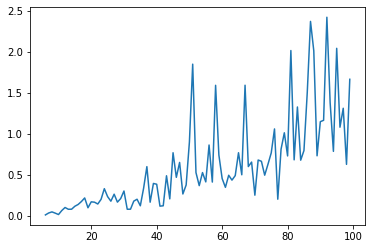

In [7]:
import seaborn as sns
%matplotlib inline
sns.lineplot(x=range(6,max_num),y=time_list)